# Example Reading Notes

This is an example of noting your own reading, understanding, and realising process of an academic paper [[Goodfellow et al. 2014](https://arxiv.org/abs/1406.2661)]. 

__NB1__: Critical commnents, as required by Assignment 1, are NOT included (Section 2 is a placeholder). 

__NB2__: The contents in the example show an active learning experience, so not all arguments are accurate and consistent. 

# 1. My First Read

You can freely note all your confusions and your effort on understanding:
- unfamilier notions, 
- the confusing way the author described something
- un-justified claim -- which you find hard to swallow but experts seem to accept
- etc. et.

If you have listed here some points-of-confusion, and have shown evidence that you did your share of research, study, contemplation and discussion, then the miss or mis-understanding of the corresponding part in Section 2 -- the main body of critical review, can be forgiven.

Below are some examples:

## 1.1 Generative Model

In the [paper](https://arxiv.org/abs/1406.2661)
- What makes a "model" of the data? Does it mean a function mapping from observed part $x$ to some unknown target label $y$? (this is a WRONG answer here).
- The difference between a discriminative and a generative model:
    - Can we distinguish a generative model $G$ and a discriminative model $D$ by their inputs and outputs?
    - Is the "discriminator" a discriminative model in a standard sense?
    


My understanding is as follows:

Generative and discriminative models are defined by "what they try to describe": gen: $P(X)$ and $P(X|Y)$ -- building a model of how the world works, and then try to draw conclusion about whatever is concerned according to the world model. 

On the other hand, a discriminative model describes $P(Y|X)$ -- trying to directly answer the questions.

Discriminator in GAN is different from traditional discriminative model: it describes $P(X)$, distinguishing a sample $x$ belonging to $\mathcal{X}$ or not. While a discriminative model describes $P(Y|X)$.



## 1.2 Multilayer perceptron
- Why people call NN multilayer perceptrons?
- What is a single layer perceptrons?
- What is a single perceptron?
- How to "train" a perceptron?

## 1.3 Computational challenge in max likelihood
- Can you show an example of a so-called maximal likelihood *problem* in generative model?
In the following, we will consider the difficulty of this and related problems:
- Can you think of examples, in which computing $P(X)$ is NOT difficult?
- Discuss "generative" models. The name "generative" usually mean that the conditional relation of the "cause" variable $Y$ and the observed phenomenon $X$ is modelled. But there are at least 2 ways of *describe* $X|Y$
    - generating generative model
    - discriminating generative model

# 2 Read and Write Critical Review

Please complete this part following the [specification](ref/spec.pdf). 

# 3 Try the algorithm

## 3.1 Preparation
The following few blocks are useful book-keeping templates -- you can organise all options and other experiment configurations here.

In [320]:
# This is a 
import argparse
import os

parser = argparse.ArgumentParser(description='Options')
parser.add_argument(
    '--random-seed', metavar='RS', type=int,
    help='Random seed')
parser.add_argument(
    '--noise-dim', metavar='dz', type=int,
    help='Dimension of noises z')
parser.add_argument(
    '--data-root', metavar='DDIR', type=str,
    help='Training data dir; for torchvision')
parser.add_argument(
    '--basic-channels', metavar='ngf', type=int,
    help='First conv layer channels')
parser.add_argument(
    '--learning-rate', metavar='lr', type=float,
    help='Learning rate')
parser.add_argument(
    '--batch-size', metavar='n', type=int,
    help='#.samples in a minibatch')
parser.add_argument(
    '--max-iter', metavar='MAXITER', type=int,
    help='training batches')
parser.add_argument('--report_per_n_steps_loss', type=int)
parser.add_argument('--report_per_n_steps_draw', type=int)
HOME_DIR = os.path.expanduser('~') # this gives your home directory

In [321]:
opt = parser.parse_args([
    '--random-seed', '42',
    '--noise-dim', '64',
    '--data-root', os.path.join(HOME_DIR, 'data', 'common'),
    '--basic-channels', '64',
    '--learning-rate', '0.001',
    '--batch-size', '4',
    '--max-iter', '1000000',
    '--report_per_n_steps_loss', '50',
    '--report_per_n_steps_draw', '100'
])

In [ ]:
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def show(img):
    npimg = img.detach().numpy()
    npimg -= npimg.min()
    npimg /= npimg.max()
    if npimg.shape[0] in [3,4]:
        plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    else:
        plt.imshow(npimg.squeeze(), interpolation='nearest')

## 3.2 Get data
We will use CIFAR-10. 

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = torchvision.datasets.CIFAR10(
    root=opt.data_root, train=True,
    download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=opt.batch_size,
    shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root=opt.data_root, train=False,
    download=True, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=opt.batch_size,
    shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
for x, y in trainloader:
    break
print(x.shape)
print(y.shape)
show(x[0])
print(classes[y[0]])

### Generator net
__Ready!__ Let's import torch and make some noises. As we know know the _format_ of the data, we are ready to build a generator net.

In [ ]:
import torch
torch.random.manual_seed(opt.random_seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
a = torch.randn(1, 1, opt.noise_dim).to(device)

__Nice!__ Let's try to make our generator!

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# do two samples (any thing more than one should be OK)
# -- why one sample is NOT so OK here?
z = torch.randn(2, opt.noise_dim, 1, 1).to(device)
print(z.shape)

Let's try map $z$ to a (fake) image. Please check this [nice animation](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) for [transposed convolution](https://pytorch.org/docs/stable/nn.html?highlight=convtranspose#torch.nn.ConvTranspose2d).

In [ ]:
tst_convtr = nn.ConvTranspose2d(
    in_channels=64, 
    out_channels=64, 
    kernel_size=3,
    stride=2
)

In [ ]:
# check the effect of the temporary deconv
tmp = tst_convtr(z)
print(tmp.shape)
tmp = tst_convtr(tmp)
print(tmp.shape)
tmp = tst_convtr(tmp)
print(tmp.shape)
tmp = tst_convtr(tmp)
print(tmp.shape)

It seems that we can stack the kernels as above to have a more or less image. -- Wait, we are still short of one pixel, right? Let's try another strategy. Check a tutorial on [DC-GAN](https://github.com/ResByte/pytorch-gan/blob/master/networks.py).

In [ ]:
tst_convtr1 = nn.ConvTranspose2d(
    in_channels=64, 
    out_channels=64, 
    kernel_size=4,
    stride=2,
    padding=1
)
# please check the effect of padding and stride. 
tmp = tst_convtr1(z)
print(tmp.shape)
tmp = tst_convtr1(tmp)
print(tmp.shape)
tmp = tst_convtr1(tmp)
print(tmp.shape)
tmp = tst_convtr1(tmp)
print(tmp.shape)

Now we make our generator. Note we cannot use the same conv layer many times now!

In [ ]:
# KSIZE = 4
class GNet_CIFAR(nn.Module):
    def __init__(self, opt):
        super(GNet_CIFAR, self).__init__()
        self.convtr1 = nn.ConvTranspose2d(
            in_channels=opt.noise_dim, 
            out_channels=opt.basic_channels*4,
            kernel_size=4,
            stride=1,
            padding=0,
            bias=False)
        self.convtr2 = nn.ConvTranspose2d(
            opt.basic_channels*4, opt.basic_channels*2, 
            kernel_size=4, stride=2, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(opt.basic_channels*2)
        self.convtr3 = nn.ConvTranspose2d(
            opt.basic_channels*2, opt.basic_channels, 
            kernel_size=4, stride=2, padding=1, bias=False)
        self.convtr4 = nn.ConvTranspose2d(
            opt.basic_channels, 3, 
            kernel_size=4, stride=2, padding=1, bias=False)
        
        self.bn1 = nn.BatchNorm2d(opt.basic_channels*4)
        self.bn2 = nn.BatchNorm2d(opt.basic_channels*2)
        self.bn3 = nn.BatchNorm2d(opt.basic_channels)
        
        
    def forward(self, x):
        h = self.convtr1(x)
        h = self.bn1(h)
        h = F.relu(h)
        h = self.convtr2(h)
        h = self.bn2(h)
        h = F.relu(h)
        h = self.convtr3(h)
        h = self.bn3(h)
        h = F.relu(h)
        h = self.convtr4(h)
        h = F.tanh(h)
        
        return h
        

In [ ]:
g = GNet_CIFAR(opt)
tmp = g(z)
print(tmp.shape)

In [ ]:
show(tmp[0])

__BINGO!__ Now we can generate seemingly image data from noises!

### Discriminator
It is relatively easy, just reverse the generator net would do!

In [ ]:
# KSIZE = 4
class DNet_CIFAR(nn.Module):
    def __init__(self, opt):
        super(DNet_CIFAR, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=3, 
            out_channels=opt.basic_channels,
            kernel_size=4)
        
        self.conv2 = nn.Conv2d(
            opt.basic_channels, opt.basic_channels*2, 
            kernel_size=4)
        self.conv3 = nn.Conv2d(
            opt.basic_channels*2, opt.basic_channels*4, 
            kernel_size=4)
        self.linear = nn.Linear(1024, 1)
        
        
        self.bn1 = nn.BatchNorm2d(opt.basic_channels*2)
        
        
        
    def forward(self, x):
        h = self.conv1(x)
        h = F.leaky_relu(h, 0.2, inplace=True)
        h = F.max_pool2d(h, 2)
        h = self.conv2(h)
        h = self.bn1(h)
        h = F.leaky_relu(h, 0.2, inplace=True)
        h = F.max_pool2d(h, 2)
        h = self.conv3(h)
        h = self.linear(h.view(h.shape[0], -1))
        h = F.sigmoid(h)
        return h
        

In [ ]:
dnet = DNet_CIFAR(opt)
tmpd = dnet(tmp)
print(tmpd.shape)

Almost there. 
### Training

In [ ]:
from torch.optim import Adam

In [ ]:
dnet = DNet_CIFAR(opt).to(device)
gnet = GNet_CIFAR(opt).to(device)
optim_discrim = Adam(dnet.parameters(), lr=opt.learning_rate)
optim_gen = Adam(gnet.parameters(), lr=opt.learning_rate)

Let's mix a set of true and fake samples:

$x \sim p_{data}$

In [ ]:
x_true, _ = next(iter(trainloader)) # we don't care labels for now
print(x_true.shape) 

In [ ]:
z = torch.randn(opt.batch_size, opt.noise_dim, 1, 1).to(device)
x_fake = gnet(z).detach()
print(x_fake.shape)

#### Sanity check -- level 2
Let us see that at least x_true and x_fake "looks" like each other.

In [ ]:
xi, yi = 10, 20

tmp1 = x_true.numpy()[0][1][yi:yi+3, xi:xi+3]
tmp2 = x_fake.numpy()[0][1][yi:yi+3, xi:xi+3]
print(tmp1)
print(tmp2)

If you get something like:
```
tmp1:
[[0.4039216  0.24705887 0.12156868]
 [0.39607847 0.32549024 0.15294123]
 [0.45882356 0.3803922  0.254902  ]]
tmp2:
[[ 0.0331481   0.00940669  0.05687319]
 [-0.05914152 -0.09792151 -0.017635  ]
 [-0.08244717  0.02879676  0.06257532]]
```

The scales don't match. And you may want to check data normalization, etc. (However, try other areas first!)

Now everything is good.

In [ ]:
x_sample = torch.cat((x_true, x_fake), dim=0)
print(x_sample.shape)

In [ ]:
y_true = torch.ones(opt.batch_size).to(device)
y_fake = torch.zeros(opt.batch_size).to(device)
y_sample = torch.cat((y_true, y_fake))

In [ ]:
pred = dnet(x_sample).squeeze()
print (pred.shape)

In [ ]:
pred

#### Design the loss

Check the explanations
[BCE for generator](https://stats.stackexchange.com/questions/242907/why-use-binary-cross-entropy-for-generator-in-adversarial-networks)

[Understanding loss](https://ai.stackexchange.com/questions/3488/understanding-gan-loss-function)

In [ ]:
criterion = nn.BCELoss()

In [ ]:
optim_discrim.zero_grad()
pred = dnet(x_sample).squeeze()
loss = criterion(pred, y_sample)
print(pred)
print(loss)
loss.backward()
optim_discrim.step()

OK, we are ready to make the trainer for discriminator

In [ ]:
def train_discrim():
    """
    Since we will make a GAN class eventually, we will use some
    global objects available, including
    - trainloader
    - opt
    - gnet
    - dnet
    - optim_discrim
    - criterion
    """
    
    x_true, _ = next(iter(trainloader))
    z = torch.randn(opt.batch_size, opt.noise_dim, 1, 1).to(device)
    x_fake = gnet(z).detach()
    x_sample = torch.cat((x_true, x_fake), dim=0)
    
    y_true = torch.ones(opt.batch_size).to(device)
    y_fake = torch.zeros(opt.batch_size).to(device)
    y_sample = torch.cat((y_true, y_fake))
    
    pred = dnet(x_sample).squeeze()
    print(pred)
    optim_discrim.zero_grad()
    loss = criterion(pred, y_sample)
    loss.backward()
    optim_discrim.step()
    return loss
    

In [ ]:
loss_dis = train_discrim()
print(loss_dis)

Wonderful! Let's deal with the generator.

In [ ]:
z = torch.randn(opt.batch_size*2, opt.noise_dim, 1, 1).to(device)
x_fake = gnet(z) #! You cannot detach it NOW!
gen_plausib = dnet(x_fake)
print(gen_plausib)

Errrrrr.... something went wrong.

In [ ]:
x_true, _ = next(iter(trainloader))
z = torch.randn(opt.batch_size*2, opt.noise_dim, 1, 1).to(device)
x_fake = gnet(z)
x_sample = torch.cat((x_true, x_fake), dim=0)
print(dnet(x_sample))
print(dnet(x_fake))

#### A werid issue
Look above, for the same bunch of fake samples, the discriminator gave very different prediction.

Presumbly, the batch-normalization have rendered within batch true and fake samples very different. Let's separate true and fake samples in two batches.

In [ ]:
y_ones = torch.ones(opt.batch_size).to(device)
y_zeros = torch.zeros(opt.batch_size).to(device)
def train_discrim():
    """
    Since we will make a GAN class eventually, we will use some
    global objects available, including
    - trainloader
    - opt
    - gnet
    - dnet
    - optim_discrim
    - criterion
    """
    optim_discrim.zero_grad()
    
    x_true, _ = next(iter(trainloader))
    pred_1 = dnet(x_true).squeeze()
    loss_dis_1 = criterion(pred_1, y_ones)
    
    
    z = torch.randn(opt.batch_size, opt.noise_dim, 1, 1).to(device)
    x_fake = gnet(z).detach()
    pred_2 = dnet(x_fake).squeeze()
    loss_dis_2 = criterion(pred_2, y_zeros)
    
    loss = loss_dis_1 + loss_dis_2
    loss.backward()
    optim_discrim.step()
    return loss
    

In [ ]:
loss_dis = train_discrim()
print(loss_dis)

In [ ]:
z = torch.randn(opt.batch_size*2, opt.noise_dim, 1, 1).to(device)
x_fake = gnet(z) #! You cannot detach it NOW!
gen_plausib = dnet(x_fake)
print(gen_plausib)

OK, now everything looks fine, our generator worked terrible!

In [ ]:
def train_gen():
    """
    Global variables
    - optim_gen
    - gnet
    - dnet
    - opt
    """
    optim_gen.zero_grad()
    z = torch.randn(opt.batch_size*2, opt.noise_dim, 1, 1).to(device)
    x_fake = gnet(z) #! You cannot detach it NOW!
    gen_plausib = dnet(x_fake)
    loss_gen = (1.0 - gen_plausib).sum()
    loss_gen.backward()
    optim_gen.step()
    return loss_gen, x_fake
    
    

In [ ]:
l, x_fake = train_gen()

In [ ]:
iters = 0
while iters<opt.max_iter:
    loss_dis = train_discrim()
    loss_gen, x_fake = train_gen()
    
    if iters % opt.report_per_n_steps_loss==0:
        print("{:d} steps: Loss D: {:.3f} G: {:.3f} +:{:.3f}".format(
            iters, loss_dis, loss_gen, loss_dis+loss_gen
        ))

    if iters % opt.report_per_n_steps_draw==0:
        show(x_fake[0])
    iters+=1

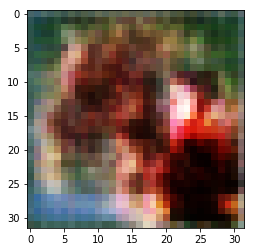

In [327]:
show(x_fake[3])

In [328]:
_, x_fake = train_gen()

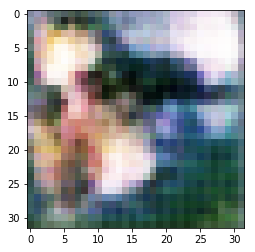

In [331]:
show(x_fake[2])